# Explore the results of the given examples

### Import the required packages and disable some expected warnings

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('default')  # reset
# you can list with: plt.style.available
plt.style.use(['seaborn-paper']) # you can combine sevaral

# This is the linewidth in latex. Shown in the compilation log
# by: \showthe\textwidth inside \begin{document}
latex_linewidth = 483.69687

# Custom style: adjust here the fonts and sizes
latex_params = {
        # Use LaTeX to write all text
        # "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots (a bit smaller than 11pt font in document)
        "font.size": 10,
        "axes.labelsize": 10,
        "axes.labelpad": 2.0,
        # Make the legend/label fonts and pads a little smaller
        "legend.fontsize": 8,
        "legend.framealpha": 0.5,
        "legend.labelspacing": 0.2,
        "legend.borderpad": 0.2,
        "legend.borderaxespad": 0.3,
        "xtick.labelsize": 8,
        "ytick.labelsize": 8,
        "xtick.major.pad": 2,
        "ytick.major.pad": 2,
        "axes.grid": True,
        # Plots
        "lines.linewidth": 1,
        "lines.markeredgewidth": 0.5,
        "lines.markersize": 1,
        "image.cmap" : 'cool',
        # Save with small borders
        "savefig.bbox": 'tight',
        "savefig.pad_inches": 0.03,
        "figure.autolayout" : True
}
mpl.rcParams.update(latex_params)


def fig_size(fraction=1, height_ratio=(5**.5 - 1)/2, subplot=[1, 1]):
    """ Computes figure dimensions to avoid scaling in latex.

    Parameters
    ----------
    fraction: float
            Fraction of the width which you wish the figure to occupy
    height_ratio: float
            Ratio between hight and width (golden by default)
    subplot: int list
            Sublots count
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure
    fig_width_pt  = latex_linewidth * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Figure width in inches
    fig_width_in  = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * height_ratio * (subplot[0] / subplot[1])

    return (fig_width_in, fig_height_in)

In [3]:
pip install morphio


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install neurots

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install neurom

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import logging

from morphio import set_ignored_warning
from morphio import Warning
from neurom import load_morphology
from neurom.view import plotly_impl

logging.getLogger("neurots.generate.grower").disabled = True
set_ignored_warning([Warning.zero_diameter], True)

### Run the example extract_synthesis_inputs.py and plot the result

In [ ]:
# Create 100 Neurons from C220197A-P2 https://neuromorpho.org/KeywordResult.jsp?count=1&keywords=%22C220197A-P2%22

In [21]:
import neurots
from neurots import extract_input
import json


def extract_distr_and_param(output_dir, data_dir):
    # Generate distribution from directory of neurons
    distr = extract_input.distributions(
        data_dir / "neurons", feature="path_distances", diameter_model="default"
    )

    # Save distributions in a json file
    with open(output_dir / f"bio612/test_distr.json", "w", encoding="utf-8") as f:
        json.dump(distr, f, sort_keys=True, indent=2)

    # Generate default parameters for topological synthesis of basal dendrites
    params = extract_input.parameters(feature="path_distances", method="tmd")

    # Save parameters in a json file
    with open(output_dir / f"bio612/test_params.json", "w", encoding="utf-8") as f:
        json.dump(params, f, sort_keys=True, indent=2)

In [22]:
# extract_synthesis_inputs.py
def generate_cell(input_name, output_dir, output_name, nb_cells):
    # Re-load data from saved distributions
    with open(f"{input_name}_distr.json", "r", encoding="utf-8") as F:
        distr = json.load(F)

    # Re-load data from saved parameters
    with open(f"{input_name}_params.json", "r", encoding="utf-8") as F:
        params = json.load(F)

    for i in range(nb_cells):
        # Initialize a neuron
        N = neurots.NeuronGrower(input_distributions=distr, input_parameters=params)

        # Grow the neuron
        neuron = N.grow()

        # Export the synthesized cell
        neuron.write(f"{output_name}_{i}.swc")
        print(f"{output_name}_{i}.swc")

# Load file names

# Synthesize normal and pathological cells

In [36]:
from pathlib import Path
import os 

type_  = 'L4_UPC'
folder = f"Cortical_morphologies/{type_}"
filenames = os.listdir(folder)
filenames =[file.split('.')[0] for file in filenames if ".asc" in file]

folder = ['synthetic', 'shrunk_75']
for file in filenames:
    for fold in folder:
        if type_ == 'L4_UPC':
            nrep = 4
        else:
            nrep = 3
        if fold == 'shrunk_75':
            suffix = fold + '_'
            output_dir = Path(f"Cortical_morphologies/{fold}_synthetic_{type_}")
            input_name = output_dir / f'shrunk_0.75_{file}'
            output_name = output_dir / f"shrunk_0.75_synthetic_{file}"
        else:
            suffix = ''
            output_dir  = Path(f"Cortical_morphologies/{fold}_{type_}")
            input_name  = output_dir / file
            output_name = output_dir / f"synthetic_{file}"
        generate_cell(input_name, output_dir, output_name, nrep)

Cortical_morphologies/synthetic_L4_UPC/synthetic_vd110518_idB_0.swc
Cortical_morphologies/synthetic_L4_UPC/synthetic_vd110518_idB_1.swc
Cortical_morphologies/synthetic_L4_UPC/synthetic_vd110518_idB_2.swc
Cortical_morphologies/synthetic_L4_UPC/synthetic_vd110518_idB_3.swc
Cortical_morphologies/shrunk_75_synthetic_L4_UPC/shrunk_0.75_synthetic_vd110518_idB_0.swc
Cortical_morphologies/shrunk_75_synthetic_L4_UPC/shrunk_0.75_synthetic_vd110518_idB_1.swc
Cortical_morphologies/shrunk_75_synthetic_L4_UPC/shrunk_0.75_synthetic_vd110518_idB_2.swc
Cortical_morphologies/shrunk_75_synthetic_L4_UPC/shrunk_0.75_synthetic_vd110518_idB_3.swc
Cortical_morphologies/synthetic_L4_UPC/synthetic_rp120608_P_3_idB_0.swc
Cortical_morphologies/synthetic_L4_UPC/synthetic_rp120608_P_3_idB_1.swc
Cortical_morphologies/synthetic_L4_UPC/synthetic_rp120608_P_3_idB_2.swc
Cortical_morphologies/synthetic_L4_UPC/synthetic_rp120608_P_3_idB_3.swc
Cortical_morphologies/shrunk_75_synthetic_L4_UPC/shrunk_0.75_synthetic_rp120608_

# Load populations SSC healthy and pathological

In [100]:
import numpy as np 
import tmd
import matplotlib.pyplot as plt
import os

def persistent_diagram_synth_vs_reco(neuron_types, feature='radial_distances'):
    
    fig, axs = plt.subplots(3, 2, figsize=fig_size(fraction=1, height_ratio=1.4), sharex=True)
    axs      = axs.ravel()
    i        = 0
    for type_ in neuron_types:
        folder = f"Cortical_morphologies/synthetic_{type_}"
        path_synth_health = os.listdir(folder)
        path_synth_health =[f"{folder}/{file}" for file in path_synth_health if ".swc" in file]


        folder = f"Cortical_morphologies/shrunk_75_synthetic_{type_}"
        path_synth_path = os.listdir(folder)
        path_synth_path =[f"{folder}/{file}" for file in path_synth_path if ".swc" in file]


        ## Synthesized neurons
        #points_all = np.empty((0, 2))
        #for path in path_synth_health:
        #    neuron = tmd.io.load_neuron_from_morphio(path)
        #    points = tmd.methods.get_ph_neuron(neuron, feature=feature)
        #    points_all = np.append(points_all, np.array(points), axis=0)

        #points_all = np.vstack([points_all[:, 0], points_all[:, 1]])
        #np.save(f'points_all_{type_}.npy', points_all)
        points_all = np.load(f'points_all_{type_}.npy')
        
        
        z = gaussian_kde(points_all)(points_all)
        sc1 = axs[i].scatter(points_all[0, :], points_all[1, :], c=z, s=1)
        if i in [4, 5]:
            axs[i].set_xlabel('Final radial dist. from soma ($\mu$m)')
        axs[i].set_ylabel('Initial radial dist. from soma ($\mu$m)')
        axs[i].set_title('Healthy ' + type_)
        
        i = i + 1
        # Synthesized neurons
        #points_all2 = np.empty((0, 2))
        #for path in path_synth_path:
        #    neuron = tmd.io.load_neuron_from_morphio(path)
        #    points = tmd.methods.get_ph_neuron(neuron, feature=feature)
        #    points_all2 = np.append(points_all2, np.array(points), axis=0)

        #points_all2 = np.vstack([points_all2[:, 0], points_all2[:, 1]])
        #np.save(f'points_all_patho{type_}.npy', points_all2)
        points_all2 = np.load(f'points_all_patho{type_}.npy')
        
        z2 = gaussian_kde(points_all2)(points_all2)
        sc2 = axs[i].scatter(points_all2[0, :], points_all2[1, :], c=z2, s=1)
        axs[i].set_title('Pathological ' + type_)
        if i in [4, 5]:
            axs[i].set_xlabel('Final radial dist. from soma ($\mu$m)')
        axs[i].set_ylabel('')
        axs[i].set_yticklabels([])

        # Determine the minimum and maximum values for the colorbar range
        c_min = min(np.min(z), np.min(z2))
        c_max = max(np.max(z), np.max(z2))

        # Set the same colorbar range for both subplots
        sc1.set_clim(c_min, c_max)
        sc2.set_clim(c_min, c_max)

        # Add colorbars to the subplots
        cbar1 = plt.colorbar(sc1, ax=axs[i-1])
        cbar2 = plt.colorbar(sc2, ax=axs[i])
        i = i + 1

    
    fig.savefig('PD_density_RD.pdf')


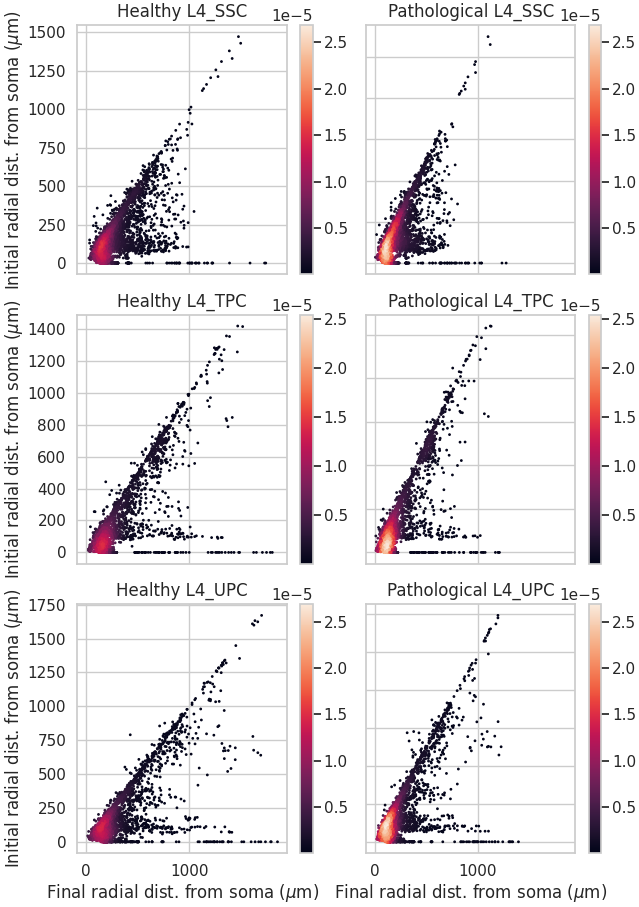

In [101]:
from scipy.stats import gaussian_kde

neuron_type = ['L4_SSC', 'L4_TPC', 'L4_UPC']
persistent_diagram_synth_vs_reco(neuron_type)

In [9]:
import os
import numpy as np
import morphio
from neurom.core.morphology import Morphology
from neurom.core.population import Population
from neurom.io.utils import load_morphologies
from collections import defaultdict
import neurom as nm
morphio.set_maximum_warnings(0)

# Neurite types of interest
NEURITES_ = (nm.NeuriteType.apical_dendrite,
             nm.NeuriteType.basal_dendrite)


# Features of interest
FEATURES = ('number_of_neurites', 
            'number_of_sections', 
            'section_term_lengths', 
            'number_of_bifurcations',
            'section_lengths',
            'section_tortuosity', 
            'section_radial_distances',
            'section_path_distances',
            'section_branch_orders', 
            'local_bifurcation_angles')

def load_neurite_features_pop(filepath):
    """Unpack relevant data into megadict."""
    stuff = defaultdict(lambda: defaultdict(list))
    morphs = nm.load_morphologies(filepath)
    # unpack data into arrays
    for t in NEURITES_:
        for feat in FEATURES:
            stuff[feat][str(t).split('.')[1]].extend(
                nm.get(feat, morphs, neurite_type=t)
            )
    return stuff


type_ = 'L4_SSC'
folder = f"Cortical_morphologies/synthetic_{type_}"
path_synth_health = os.listdir(folder)
path_synth_health =[f"{folder}/{file}" for file in path_synth_health if ".swc" in file]

folder = f"Cortical_morphologies/shrunk_75_synthetic_{type_}"
path_synth_path = os.listdir(folder)
path_synth_path =[f"{folder}/{file}" for file in path_synth_path if ".swc" in file]

features_synth_health = load_neurite_features_pop(path_synth_health)
features_synth_patho  = load_neurite_features_pop(path_synth_path)

/tmp/ipykernel_327/1316572977.py:14: RuntimeWarning: invalid value encountered in double_scalars
  pd_synth_health.loc[row, col] = (pd_synth_health.loc[row, col][0] - med)/std
/tmp/ipykernel_327/1316572977.py:15: RuntimeWarning: invalid value encountered in double_scalars
  pd_synth_patho.loc[row, col]  = (pd_synth_patho.loc[row, col][0]  - med)/std
/tmp/ipykernel_327/1316572977.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd_all = pd_all.append(pd_synth_patho)


[Text(0.5, 0, 'absolute values'), Text(0, 0.5, ''), Text(0.5, 1.0, 'L4_TPC')]

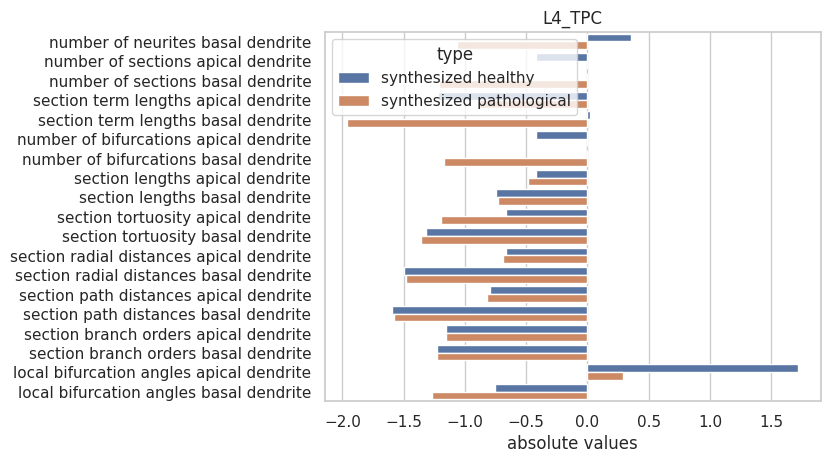

In [102]:
import pandas as pd 
import seaborn as sns

pd_synth_health = pd.DataFrame(features_synth_health)
pd_synth_patho  = pd.DataFrame(features_synth_patho)
if type_ == 'L4_SSC':
    pd_synth_patho  = pd_synth_patho.drop('apical_dendrite')
    pd_synth_health = pd_synth_health.drop('apical_dendrite')
    
for row in list(pd_synth_health.index):
    for col in  list(pd_synth_health):
        med = np.median(pd_synth_health.loc[row, col])
        std = np.std(pd_synth_health.loc[row, col])
        pd_synth_health.loc[row, col] = (pd_synth_health.loc[row, col][0] - med)/std
        pd_synth_patho.loc[row, col]  = (pd_synth_patho.loc[row, col][0]  - med)/std

pd_synth_health = pd_synth_health.unstack()
pd_synth_health.index = pd_synth_health.index.map('_'.join)
pd_synth_health.index = pd_synth_health.index.str.split('_')
pd_synth_health.index = pd_synth_health.index.map(' '.join)
pd_synth_health = pd.DataFrame(pd_synth_health)
pd_synth_health['type'] = ['synthesized healthy'] * len(pd_synth_health.index)
pd_synth_health = pd_synth_health.rename({0: "signal"}, axis='columns')

pd_synth_patho = pd_synth_patho.unstack()
pd_synth_patho.index = pd_synth_patho.index.map('_'.join)
pd_synth_patho.index = pd_synth_patho.index.str.split('_')
pd_synth_patho.index = pd_synth_patho.index.map(' '.join)
pd_synth_patho = pd.DataFrame(pd_synth_patho)
pd_synth_patho['type']  = ['synthesized pathological'] * len(pd_synth_patho.index)
pd_synth_patho = pd_synth_patho.rename({0: "signal"}, axis='columns')

pd_all = pd_synth_health
pd_all = pd_all.append(pd_synth_patho)

pd_all = pd_all.reset_index()
pd_all.to_csv(f'Cortical_morphologies/{type_}_features.csv', index=False)

pd_all = pd.read_csv(f'Cortical_morphologies/{type_}_features.csv')

ax = sns.barplot(data=pd_all.dropna(), x="signal", y='index', hue='type')
ax.set(xlabel='absolute values', ylabel='', title=type_)

In [48]:
import os
import numpy as np
import morphio
from neurom.core.morphology import Morphology
from neurom.core.population import Population
from neurom.io.utils import load_morphologies
from collections import defaultdict
import neurom as nm
morphio.set_maximum_warnings(0)

# Neurite types of interest
NEURITES_ = (nm.NeuriteType.apical_dendrite,
             nm.NeuriteType.basal_dendrite)


# Features of interest
FEATURES = ('number_of_neurites', 
            'number_of_sections', 
            'section_term_lengths', 
            'number_of_bifurcations',
            'section_lengths',
            'section_tortuosity', 
            'section_radial_distances',
            'section_path_distances',
            'section_branch_orders', 
            'local_bifurcation_angles')

def load_neurite_features_pop(filepath):
    """Unpack relevant data into megadict."""
    stuff = defaultdict(lambda: defaultdict(list))
    morphs = nm.load_morphologies(filepath)
    # unpack data into arrays
    for t in NEURITES_:
        for feat in FEATURES:
            stuff[feat][str(t).split('.')[1]].extend(
                nm.get(feat, morphs, neurite_type=t)
            )
    return stuff


groups = ['L4_SSC', 'L4_UPC', 'L4_TPC']
id_ = 0
pd_all = pd.DataFrame()
for group in groups:
    print(group)
    
    folder = f"Cortical_morphologies/synthetic_{group}"
    path_synth_health = os.listdir(folder)
    path_synth_health =[f"{folder}/{file}" for file in path_synth_health if ".swc" in file]

    folder = f"Cortical_morphologies/shrunk_75_synthetic_{group}"
    path_synth_patho = os.listdir(folder)
    path_synth_patho =[f"{folder}/{file}" for file in path_synth_patho if ".swc" in file]

    for i, path in enumerate(path_synth_health):
        features_synth_health = load_neurite_features_pop(path_synth_health[i])
        pd_synth_health = pd.DataFrame(features_synth_health)
        
        features_synth_patho = load_neurite_features_pop(path_synth_patho[i])
        pd_synth_patho = pd.DataFrame(features_synth_patho)
        
        if group == 'L4_SSC':
            pd_synth_patho  = pd_synth_patho.drop('apical_dendrite')
            pd_synth_health = pd_synth_health.drop('apical_dendrite')
        
        pd_synth_health = pd_synth_health.unstack()
        pd_synth_health.index = pd_synth_health.index.map('_'.join)
        pd_synth_health.index = pd_synth_health.index.str.split('_')
        pd_synth_health.index = pd_synth_health.index.map(' '.join)
        pd_synth_health = pd.DataFrame(pd_synth_health)
        pd_synth_health = pd_synth_health.reset_index()
        pd_synth_health['type']  = ['synthesized healthy'] * len(pd_synth_health.index)
        pd_synth_health['id']    = [id_] * len(pd_synth_health.index)
        id_ = id_ + 1
        pd_synth_health['group'] = [group] * len(pd_synth_health.index)
        pd_synth_health = pd_synth_health.rename({0: "signal"}, axis='columns')
        pd_synth_health = pd_synth_health.explode('signal')
        pd_synth_health['signal'] = pd_synth_health['signal'].astype(float)

        
        pd_synth_patho = pd_synth_patho.unstack()
        pd_synth_patho.index = pd_synth_patho.index.map('_'.join)
        pd_synth_patho.index = pd_synth_patho.index.str.split('_')
        pd_synth_patho.index = pd_synth_patho.index.map(' '.join)
        pd_synth_patho = pd.DataFrame(pd_synth_patho)
        pd_synth_patho = pd_synth_patho.reset_index()
        pd_synth_patho['type']  = ['synthesized pathological'] * len(pd_synth_patho.index)
        pd_synth_patho['id']    = [id_] * len(pd_synth_patho.index)
        id_ = id_ + 1
        pd_synth_patho['group'] = [group] * len(pd_synth_patho.index)
        pd_synth_patho = pd_synth_patho.rename({0: "signal"}, axis='columns')
        pd_synth_patho = pd_synth_patho.explode('signal')
        pd_synth_patho['signal'] = pd_synth_patho['signal'].astype(float)

        pd_all = pd.concat([pd_all, pd_synth_health, pd_synth_patho])
        pd_all['neurite'] = ['basal'] * len(pd_all.index)
        pd_all.loc[pd_all['index'].str.contains('apical'), 'neurite'] = ['apical'] * len(pd_all.loc[pd_all['index'].str.contains('apical'), 'neurite'])

pd_all['index'] = pd_all['index'].str.split('_')
pd_all['index'] = pd_all['index'].map(' '.join)

a = pd_all['index'].str.split().values
a = list(a)
for i in range(len(a)):
    a[i] = a[i][:-2]
    a[i] = ' '.join(a[i])
pd_all['index'] = a

display(pd_all)
pd_all.to_csv(f'Cortical_morphologies/all_features.csv', index=False)

L4_SSC
L4_UPC
L4_TPC


,index,signal,type,id,group,neurite
0,number of neurites,5.000000,synthesized healthy,0,L4_SSC,basal
1,number of sections,79.000000,synthesized healthy,0,L4_SSC,basal
2,section term lengths,54.828751,synthesized healthy,0,L4_SSC,basal
2,section term lengths,127.211517,synthesized healthy,0,L4_SSC,basal
2,section term lengths,149.358826,synthesized healthy,0,L4_SSC,basal
...,...,...,...,...,...,...
19,local bifurcation angles,0.022368,synthesized pathological,239,L4_TPC,basal
19,local bifurcation angles,0.273102,synthesized pathological,239,L4_TPC,basal
19,local bifurcation angles,0.185213,synthesized pathological,239,L4_TPC,basal
19,local bifurcation angles,0.192245,synthesized pathological,239,L4_TPC,basal


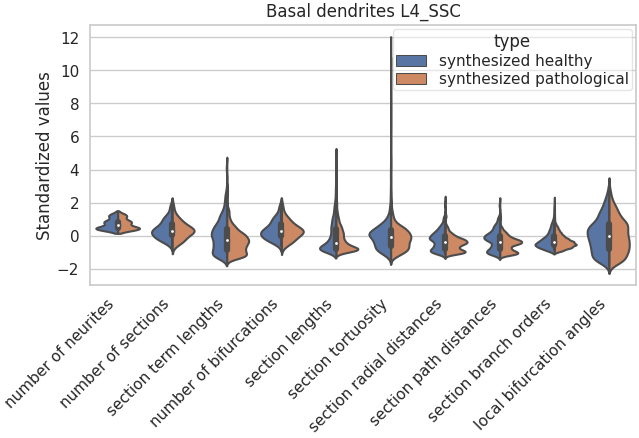

In [22]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

groups = ['L4_SSC']#['L4_SSC', 'L4_TPC', 'L4_UPC']
pd_all = pd.read_csv(f'Cortical_morphologies/all_features.csv')

# Standardise
healthy_data = pd_all[pd_all['type'] == 'synthesized healthy']

# Group the healthy data by index and calculate the standard deviation
std  = healthy_data.groupby('index')['signal'].std()
mean = healthy_data.groupby('index')['signal'].mean()

# Divide the values by the standard deviation
pd_all['normalized'] = (pd_all['signal']-pd_all['index'].map(mean)) / pd_all['index'].map(std)

for group in groups:
    if not group == 'L4_SSC':
        fig, axs = plt.subplots(2, 1, figsize=fig_size(fraction=1, height_ratio=1))
    else:
        fig, axs = plt.subplots(1, 1, figsize=fig_size(fraction=1, height_ratio=.7))
        sns.set(style = 'whitegrid')
        b = sns.violinplot(ax = axs, data=pd_all[(pd_all['neurite']=='basal') & (pd_all['group']==group)], x='index', y='normalized', hue="type", split=True)
        axs.set_xticklabels(pd_all[(pd_all['neurite']=='basal') & (pd_all['group']==group)]['index'].unique(), rotation=45, ha='right')
        axs.set_xlabel('')
        axs.set_ylabel('Standardized values')
        b.set_title(f'Basal dendrites {group}')


    if not group == 'L4_SSC':
        sns.set(style = 'whitegrid')
        b = sns.violinplot(ax = axs[0], data=pd_all[(pd_all['neurite']=='basal') & (pd_all['group']==group)], x='index', 
                       y='normalized', hue="type", split=True)
        axs[0].set_xticks([])
        axs[0].set(xlabel='', ylabel='Standardized values')
        b.set_title(f'Basal dendrites {group}')
        
        b = sns.violinplot(ax=axs[1], data=pd_all[(pd_all['neurite']=='apical') & (pd_all['group']==group)], x='index', 
                       y='normalized', hue="type", split=True)
        axs[1].set_xticklabels(pd_all[(pd_all['neurite']=='basal') & (pd_all['group']==group)]['index'].unique(), rotation=45, ha='right')
        axs[1].set(xlabel='', ylabel='Standardized values')
        b.set_title(f'Apical dendrites {group}')
    
    plt.savefig('violin_'+ group + '.pdf')

% decrease in length: 0.2623797448743555
% decrease in length: 0.25410466488503275
% decrease in length: 0.24878066127695214


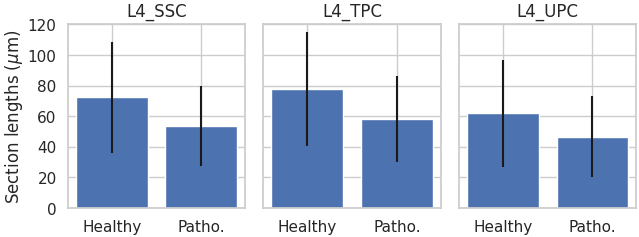

In [29]:
import pandas as pd 

pd_all = pd.read_csv(f'Cortical_morphologies/all_features.csv')

means = pd_all.groupby(['group', 'index', 'type']).mean()
stds = pd_all.groupby(['group', 'index', 'type']).std()

groups = ['L4_SSC', 'L4_TPC', 'L4_UPC']
types  = ['synthesized healthy', 'synthesized pathological']
type_labels  = ['Healthy', 'Patho.']
fig, axs = plt.subplots(1, 3, figsize=fig_size(height_ratio=0.4))
for j, group in enumerate(groups):
    # Set up the plot
    mean_tmp = []
    std_tmp = []
    for i, type_ in enumerate(types):
        
        mean = means.signal.loc[(group,'section lengths', type_)]        
        std  = stds.signal.loc[(group,'section lengths', type_)]/2
        mean_tmp.append(mean)
        std_tmp.append(std)
    
    print('% decrease in length:', (mean_tmp[0] - mean_tmp[1])/mean_tmp[0])
    axs[j].bar([0,1], mean_tmp, yerr=std_tmp, align='center')
    axs[j].set_xticks([0, 1], type_labels)
    axs[j].set_ylim([0, 120])
    axs[j].set_title(group)
    if j!= 0:
        axs[j].set_ylabel('')
        axs[j].set_yticklabels([])
    else:
        axs[j].set_ylabel('Section lengths ($\mu$m)')
        
plt.savefig('lengths.pdf')

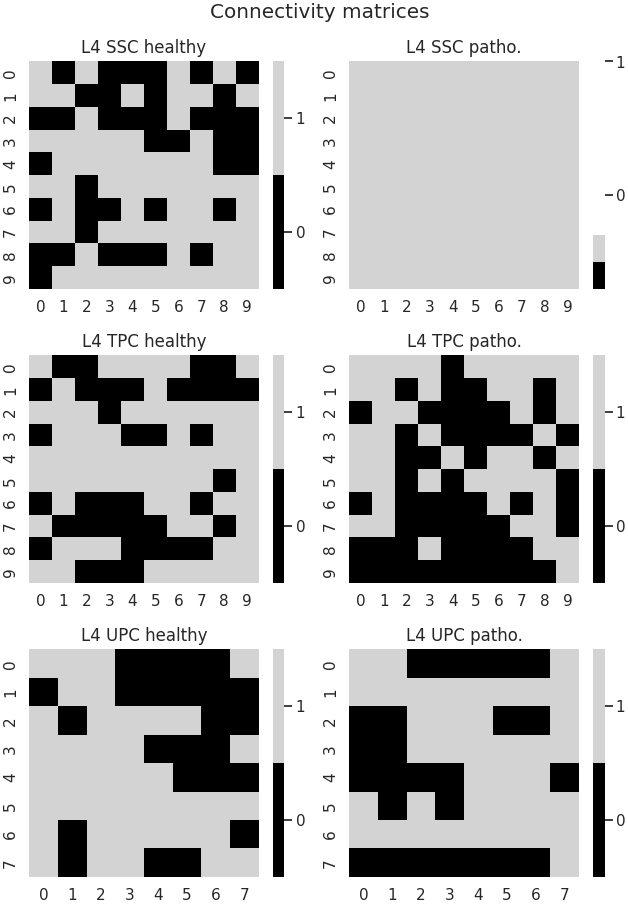

In [67]:
from pathlib import Path
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.colors import LinearSegmentedColormap

folder = Path("Cortical_morphologies")
filenames = ['connectome_L4_SSC_rep_1_interp.npy',
             'connectome_shrunk_75_L4_SSC_rep_1_interp.npy',
             'connectome_L4_TPC_rep_1_interp.npy',
             'connectome_shrunk_75_L4_TPC_rep_1_interp.npy',
             'connectome_L4_UPC_rep_1_interp.npy',
             'connectome_shrunk_75_L4_UPC_rep_1_interp.npy'
            ]

fig, axs = plt.subplots(3, 2, figsize=fig_size(height_ratio=1.4))
axs      = axs.ravel()

for i, file in enumerate(filenames):
    if file != 'connectome_shrunk_75_L4_SSC_rep_1_interp.npy':
        connectivity_mat = np.load(folder / file)
    else:
        connectivity_mat = np.zeros((10,10))
    colors = ('black', 'lightgrey')
    cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))
    ax = sns.heatmap(connectivity_mat, ax=axs[i], cbar=True, cmap=cmap)
    # Set the colorbar labels
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks([0.25,0.75])
    colorbar.set_ticklabels(['0', '1'])
    if 'SSC' in file:
        title = 'L4 SSC'
    elif 'UPC' in file:
        title = 'L4 UPC'
    elif 'TPC' in file:
        title = 'L4 TPC'
    
    if 'shrunk' in file:
        title = title + ' patho.'
    else:
        title = title + ' healthy'
        
    axs[i].set_title(title)
    


fig.suptitle('Connectivity matrices')
plt.savefig('heatmaps.pdf')

In [50]:
for i, file in enumerate(filenames):
    if file != 'connectome_shrunk_75_L4_SSC_rep_1_interp.npy':
        connectivity_mat = np.load(folder / file)
    else:
        connectivity_mat = np.zeros((10,10))
    print(file)
    print("number of connections: ", connectivity_mat.sum())

connectome_L4_SSC_rep_1_interp.npy
number of connections:  61.0
connectome_shrunk_75_L4_SSC_rep_1_interp.npy
number of connections:  0.0
connectome_L4_TPC_rep_1_interp.npy
number of connections:  63.0
connectome_shrunk_75_L4_TPC_rep_1_interp.npy
number of connections:  47.0
connectome_L4_UPC_rep_1_interp.npy
number of connections:  40.0
connectome_shrunk_75_L4_UPC_rep_1_interp.npy
number of connections:  39.0


In [25]:
pip install pyflagser

Defaulting to user installation because normal site-packages is not writeable
  Using cached pyflagser-0.4.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (452 kB)
Note: you may need to restart the kernel to use updated packages.


connectome_L4_SSC_rep_1_interp.npy
Number of simplices in each dimension: [10, 51, 153, 285, 316, 162]
Betti numbers in each dimension: [1, 0, 1, 0, 1, 22]
connectome_shrunk_75_L4_SSC_rep_1_interp.npy
Number of simplices in each dimension: [10, 0]
Betti numbers in each dimension: [10, 0]
connectome_L4_TPC_rep_1_interp.npy
Number of simplices in each dimension: [10, 53, 163, 301, 330, 192, 33]
Betti numbers in each dimension: [1, 0, 0, 0, 0, 11, 0]
connectome_shrunk_75_L4_TPC_rep_1_interp.npy
Number of simplices in each dimension: [10, 37, 64, 45]
Betti numbers in each dimension: [1, 0, 0, 9]
connectome_L4_UPC_rep_1_interp.npy
Number of simplices in each dimension: [8, 32, 68, 81, 51, 13]
Betti numbers in each dimension: [1, 0, 0, 0, 0, 0]
connectome_shrunk_75_L4_UPC_rep_1_interp.npy
Number of simplices in each dimension: [8, 31, 67, 79, 45, 8]
Betti numbers in each dimension: [1, 0, 0, 0, 1, 0]


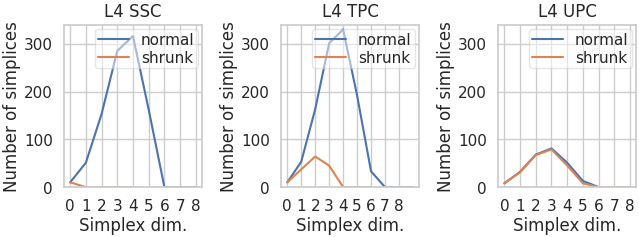

In [52]:
import pyflagser
import matplotlib

folder = Path("Cortical_morphologies")
filenames = ['connectome_L4_SSC_rep_1_interp.npy',
             'connectome_shrunk_75_L4_SSC_rep_1_interp.npy',
             'connectome_L4_TPC_rep_1_interp.npy',
             'connectome_shrunk_75_L4_TPC_rep_1_interp.npy',
             'connectome_L4_UPC_rep_1_interp.npy',
             'connectome_shrunk_75_L4_UPC_rep_1_interp.npy'
            ]

fig, axs = plt.subplots(1, 3, figsize=fig_size(height_ratio=0.4))
axs      = axs.ravel()

for i, file in enumerate(filenames):
    if file != 'connectome_shrunk_75_L4_SSC_rep_1_interp.npy':
        connectivity_mat = np.load(folder / file)
    else:
        connectivity_mat = np.zeros((10,10))
    # Call flagser and print results
    topology_dict = pyflagser.flagser_unweighted(connectivity_mat, directed=True)
    print(file)
    print("Number of simplices in each dimension:", topology_dict['cell_count'])
    print("Betti numbers in each dimension:", topology_dict['betti'])
    if 'SSC' in file:
        title = 'L4 SSC'
    elif 'UPC' in file:
        title = 'L4 UPC'
    elif 'TPC' in file:
        title = 'L4 TPC'
    
    if 'shrunk' in file:
        label = 'shrunk'
    else:
        label = 'normal'
        
    data = topology_dict['cell_count']
    data.extend([0, 0, 0])
    axs[i//2].plot(data, label = label)
    axs[i//2].legend(loc='upper right')
    axs[i//2].set_xlabel('Simplex dim.')
    axs[i//2].set_ylabel('Number of simplices')
    axs[i//2].set_title(title)
    axs[i//2].set_ylim([0, 340])
    axs[i//2].set_xticks([i for i in range(9)])
    axs[i//2].grid(visible=True)

plt.savefig('nb_simplices.pdf')

connectome_L4_SSC_rep_1_interp.npy
Number of simplices in each dimension: [10, 51, 153, 285, 316, 162]
Betti numbers in each dimension: [1, 0, 1, 0, 1, 22]
connectome_shrunk_75_L4_SSC_rep_1_interp.npy
Number of simplices in each dimension: [10, 0]
Betti numbers in each dimension: [10, 0]
connectome_L4_TPC_rep_1_interp.npy
Number of simplices in each dimension: [10, 53, 163, 301, 330, 192, 33]
Betti numbers in each dimension: [1, 0, 0, 0, 0, 11, 0]
connectome_shrunk_75_L4_TPC_rep_1_interp.npy
Number of simplices in each dimension: [10, 37, 64, 45]
Betti numbers in each dimension: [1, 0, 0, 9]
connectome_L4_UPC_rep_1_interp.npy
Number of simplices in each dimension: [8, 32, 68, 81, 51, 13]
Betti numbers in each dimension: [1, 0, 0, 0, 0, 0]
connectome_shrunk_75_L4_UPC_rep_1_interp.npy
Number of simplices in each dimension: [8, 31, 67, 79, 45, 8]
Betti numbers in each dimension: [1, 0, 0, 0, 1, 0]


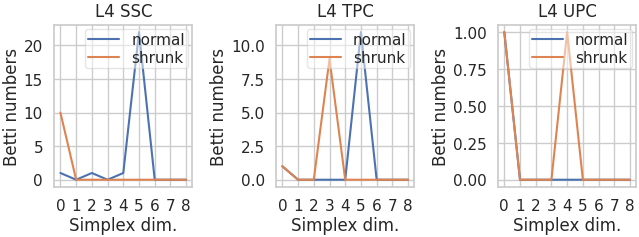

In [103]:
import pyflagser
import matplotlib

folder = Path("Cortical_morphologies")
filenames = ['connectome_L4_SSC_rep_1_interp.npy',
             'connectome_shrunk_75_L4_SSC_rep_1_interp.npy',
             'connectome_L4_TPC_rep_1_interp.npy',
             'connectome_shrunk_75_L4_TPC_rep_1_interp.npy',
             'connectome_L4_UPC_rep_1_interp.npy',
             'connectome_shrunk_75_L4_UPC_rep_1_interp.npy'
            ]

fig, axs = plt.subplots(1, 3, figsize=fig_size(height_ratio=0.4))
axs      = axs.ravel()

for i, file in enumerate(filenames):
    if file != 'connectome_shrunk_75_L4_SSC_rep_1_interp.npy':
        connectivity_mat = np.load(folder / file)
    else:
        connectivity_mat = np.zeros((10,10))
    # Call flagser and print results
    topology_dict = pyflagser.flagser_unweighted(connectivity_mat, directed=True)
    print(file)
    print("Number of simplices in each dimension:", topology_dict['cell_count'])
    print("Betti numbers in each dimension:", topology_dict['betti'])
    if 'SSC' in file:
        title = 'L4 SSC'
    elif 'UPC' in file:
        title = 'L4 UPC'
    elif 'TPC' in file:
        title = 'L4 TPC'
    
    if 'shrunk' in file:
        label = 'shrunk'
    else:
        label = 'normal'
        
    data = topology_dict['betti']
    if len(data) < 9:
        data.extend([0] * (9 - len(data)))
    axs[i//2].plot(data, label = label)
    axs[i//2].legend(loc='upper right')
    axs[i//2].set_xlabel('Simplex dim.')
    axs[i//2].set_ylabel('Betti numbers')
    axs[i//2].set_title(title)
    axs[i//2].set_xticks([i for i in range(9)])
    axs[i//2].grid(visible=True)

plt.savefig('betti.pdf')